# AutoGluon

## Preparation

### Install AutoGluon

```bash
git clone ssh://git.amazon.com/pkg/AutoGluon
cd AutoGluon
python setup.py develop
```

### Import Task

We are presenting Named Entity Recognition (NER) task in this notebook.

In [1]:
import autogluon as ag
from autogluon import named_entity_recognition as task

import logging
logging.basicConfig(level=logging.INFO)

## A Quick NER Example

We first show the most basic usage by first creating a dataset and then fiting the dataset to generate the results.

### Create AutoGluon Dataset

We will use CoNLL 2003 dataset for this tutorial. The dataset is under license so we need to manually download and specify path.

In [2]:
dataset = task.Dataset(name='CoNLL2003',
                       train_path='/home/ubuntu/conll2003/train.txt',
                       val_path='/home/ubuntu/conll2003/test.txt')

INFO:autogluon.task.named_entity_recognition.dataset:Taking default vocabulary of pre-trained model `bert_12_768_12` on `book_corpus_wiki_en_cased`. If you would like to use differentvocabulary then please pass parameter `vocab` as an instance of`nlp.Vocab`.


The constructed dataset contains the `gluon.data.DataLoader` for training and validation datasets.

Then we will use the default configuration of the NER task to generate:
* Best result of the search in terms of validation F1 score
* Get the best configuration corresponding to the best result obtained.
    
To acheive this, we are using `fit` function to generate the above results based on the datasets.

The default configruation is based on `max_trial_count=2` and `max_training_epochs=2`.

INFO:autogluon.scheduler.fifo:Starting Experiments
INFO:autogluon.scheduler.fifo:Num of Finished Tasks is 0
INFO:autogluon.scheduler.fifo:Num of Pending Tasks is 2
INFO:autogluon.scheduler.fifo:Adding A New Task Task(TASK_ID: 0) Task(fn=<function train_named_entity_recognizer at 0x7fa740dddae8>, args={'args': Namespace(data_name='conll2003', epochs=2, indexes_format={0: 'text', 3: 'ner'}, max_sequence_length=180, num_gpus=4, pretrained=True, train_path='/home/ubuntu/conll2003/train.txt', val_path='/home/ubuntu/conll2003/test.txt'), 'config': {'batch_size': 8, 'model': 'bert_12_768_12', 'optimizer': 'bertadam', 'dense_layers': 2, 'dropout': 0.32090001038338933, 'lr': 3.605943613268488e-05, 'momentum': 0.8655522972107418, 'pretrained': True}}, resources=Resources(nCPUs = 4, nGPUs = 4)))
INFO:autogluon.scheduler.fifo:Adding A New Task Task(TASK_ID: 1) Task(fn=<function train_named_entity_recognizer at 0x7fa740dddae8>, args={'args': Namespace(data_name='conll2003', epochs=2, indexes_format

Training begin: using optimizer BERTAdam with current learning rate 0.000036 
INFO:autogluon.estimator.event_handler:Training begin: using optimizer BERTAdam with current learning rate 0.000036 
Train for 2 epochs.
INFO:autogluon.estimator.event_handler:Train for 2 epochs.
[Epoch 0] Begin, current learning rate: 0.000036
INFO:autogluon.estimator.event_handler:[Epoch 0] Begin, current learning rate: 0.000036
INFO:autogluon.scheduler.reporter:StatusReporter reporting: {"task_id": 0, "epoch": 1, "accuracy": 0.8963868225292242, "time_this_iter": 147.35697269439697}
[Epoch 0] Finished in 122.332s, acc_ner: 0.9966, validation f1_ner: 0.8964
INFO:autogluon.estimator.event_handler:[Epoch 0] Finished in 122.332s, acc_ner: 0.9966, validation f1_ner: 0.8964
[Epoch 1] Begin, current learning rate: 0.000020
INFO:autogluon.estimator.event_handler:[Epoch 1] Begin, current learning rate: 0.000020
INFO:autogluon.scheduler.reporter:StatusReporter reporting: {"task_id": 0, "epoch": 2, "accuracy": 0.90693

Training begin: using optimizer SGD with current learning rate 0.000017 
INFO:autogluon.estimator.event_handler:Training begin: using optimizer SGD with current learning rate 0.000017 
Train for 2 epochs.
INFO:autogluon.estimator.event_handler:Train for 2 epochs.
[Epoch 0] Begin, current learning rate: 0.000017
INFO:autogluon.estimator.event_handler:[Epoch 0] Begin, current learning rate: 0.000017
INFO:autogluon.scheduler.reporter:StatusReporter reporting: {"task_id": 1, "epoch": 1, "accuracy": 0.048352513893143136, "time_this_iter": 144.25563097000122}
[Epoch 0] Finished in 119.184s, acc_ner: 0.0227, validation f1_ner: 0.0484
INFO:autogluon.estimator.event_handler:[Epoch 0] Finished in 119.184s, acc_ner: 0.0227, validation f1_ner: 0.0484
[Epoch 1] Begin, current learning rate: 0.000010
INFO:autogluon.estimator.event_handler:[Epoch 1] Begin, current learning rate: 0.000010
INFO:autogluon.scheduler.reporter:StatusReporter reporting: {"task_id": 1, "epoch": 2, "accuracy": 0.0483989774253

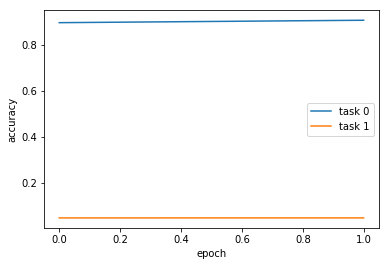

In [3]:
results = task.fit(dataset)

The best accuracy is:

In [4]:
print(results.metric)

0.9069379878957985


The associated best configuration is:

In [5]:
print(results.config)

{'batch_size': 8, 'model': 'bert_12_768_12', 'optimizer': 'bertadam', 'dense_layers': 2, 'dropout': 0.32090001038338933, 'lr': 3.605943613268488e-05, 'momentum': 0.8655522972107418, 'pretrained': True}


Total time cost is:

In [6]:
print('%.2f s' % results.time)

531.14 s


## A Step-by-step NER Example

### Import AutoGluon

In [7]:
import warnings
warnings.filterwarnings("ignore")

import autogluon as ag

We then will use `autogluon.Nets` and `autogluon.Optimizers` as examples to show the usage of auto objects. The remainining auto objects are using default value.

### Create AutoGluon Nets

`autogluon.Nets` is a list of auto networks, and allows search for the best net

* from a list of provided (or default) networks
* by choosing the best architecture regarding to each auto net.

In [8]:
nets = ag.Nets([
    task.get_model('bert_12_768_12', **{'classification_layers': ag.space.Linear('dense', lower=1, upper=2)}),
    task.get_model('bert_24_1024_16', **{'classification_layers': ag.space.Linear('dense', lower=1, upper=2)})
])

print(nets)

AutoGluon Nets ['bert_12_768_12', 'bert_24_1024_16'] with Configuration space object:
  Hyperparameters:
    dense_layers, Type: UniformInteger, Range: [1, 3], Default: 2
    dropout, Type: UniformFloat, Range: [0.0, 0.5], Default: 0.25
    model, Type: Categorical, Choices: {bert_12_768_12, bert_24_1024_16}, Default: bert_12_768_12
    pretrained, Type: Categorical, Choices: {True}, Default: True
  Conditions:
    dense_layers | model in {'bert_12_768_12', 'bert_24_1024_16'}
    dropout | model in {'bert_12_768_12', 'bert_24_1024_16'}
    pretrained | model in {'bert_12_768_12', 'bert_24_1024_16'}



### Create AutoGluon Optimizers

`autogluon.Optimizers` defines a list of optimization algorithms that allows search for the best optimization algorithm 

* from a list of provided (or default) optimizers
* by choosing the best hyper-parameters regarding to each auto optimizer

In [9]:
optimizers = ag.Optimizers(['adam', 'bertadam'])

print(optimizers)

AutoGluon Optimizers ['adam', 'bertadam'] with Configuration space object:
  Hyperparameters:
    lr, Type: UniformFloat, Range: [1e-05, 0.0001], Default: 3.16228e-05, on log-scale
    optimizer, Type: Categorical, Choices: {adam, bertadam}, Default: adam
  Conditions:
    lr | optimizer in {'adam', 'bertadam'}



### Create AutoGluon Fit - Run 2 trials parallelly using 2 GPUs each

INFO:autogluon.scheduler.fifo:Starting Experiments
INFO:autogluon.scheduler.fifo:Num of Finished Tasks is 0
INFO:autogluon.scheduler.fifo:Num of Pending Tasks is 2
INFO:autogluon.scheduler.fifo:Adding A New Task Task(TASK_ID: 2) Task(fn=<function train_named_entity_recognizer at 0x7fa740dddae8>, args={'args': Namespace(data_name='conll2003', epochs=2, indexes_format={0: 'text', 3: 'ner'}, max_sequence_length=180, num_gpus=2, pretrained=True, train_path='/home/ubuntu/conll2003/train.txt', val_path='/home/ubuntu/conll2003/test.txt'), 'config': {'batch_size': 8, 'model': 'bert_12_768_12', 'optimizer': 'adam', 'dense_layers': 1, 'dropout': 0.2543706402914567, 'lr': 5.6265374051823685e-05, 'pretrained': True}}, resources=Resources(nCPUs = 4, nGPUs = 2)))
INFO:autogluon.scheduler.fifo:Adding A New Task Task(TASK_ID: 3) Task(fn=<function train_named_entity_recognizer at 0x7fa740dddae8>, args={'args': Namespace(data_name='conll2003', epochs=2, indexes_format={0: 'text', 3: 'ner'}, max_sequence

Training begin: using optimizer Adam with current learning rate 0.000017 
INFO:autogluon.estimator.event_handler:Training begin: using optimizer Adam with current learning rate 0.000017 
Train for 2 epochs.
INFO:autogluon.estimator.event_handler:Train for 2 epochs.
[Epoch 0] Begin, current learning rate: 0.000017
INFO:autogluon.estimator.event_handler:[Epoch 0] Begin, current learning rate: 0.000017
INFO:autogluon.task.named_entity_recognition.pipeline:Task ID : 2, network : NERNet(
  (backbone): BERTModel(
    (encoder): BERTEncoder(
      (dropout_layer): Dropout(p = 0.1, axes=())
      (layer_norm): BERTLayerNorm(eps=1e-12, axis=-1, center=True, scale=True, in_channels=768)
      (transformer_cells): HybridSequential(
        (0): BERTEncoderCell(
          (dropout_layer): Dropout(p = 0.1, axes=())
          (attention_cell): MultiHeadAttentionCell(
            (_base_cell): DotProductAttentionCell(
              (_dropout_layer): Dropout(p = 0.1, axes=())
            )
           

Training begin: using optimizer Adam with current learning rate 0.000056 
INFO:autogluon.estimator.event_handler:Training begin: using optimizer Adam with current learning rate 0.000056 
Train for 2 epochs.
INFO:autogluon.estimator.event_handler:Train for 2 epochs.
[Epoch 0] Begin, current learning rate: 0.000056
INFO:autogluon.estimator.event_handler:[Epoch 0] Begin, current learning rate: 0.000056
INFO:autogluon.scheduler.reporter:StatusReporter reporting: {"task_id": 3, "epoch": 1, "accuracy": 0.8940927898582621, "time_this_iter": 195.68666672706604}
[Epoch 0] Finished in 177.682s, acc_ner: 0.9769, validation f1_ner: 0.8941
INFO:autogluon.estimator.event_handler:[Epoch 0] Finished in 177.682s, acc_ner: 0.9769, validation f1_ner: 0.8941
[Epoch 1] Begin, current learning rate: 0.000010
INFO:autogluon.estimator.event_handler:[Epoch 1] Begin, current learning rate: 0.000010
INFO:autogluon.scheduler.reporter:StatusReporter reporting: {"task_id": 2, "epoch": 1, "accuracy": 0.8956353396691

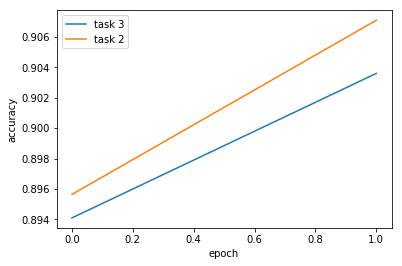

In [10]:
stop_criterion = {
    'time_limits': 1*60*60,
    'max_metric': 0.80,
    'max_trial_count': 2
}

resources_per_trial = {
    'max_num_gpus': 2,
    'max_num_cpus': 4,
    'max_training_epochs': 2
}

results = task.fit(dataset,
                   nets,
                   optimizers,
                   stop_criterion=stop_criterion,
                   resources_per_trial=resources_per_trial)

The best accuracy is:

In [11]:
print(results.metric)

0.9070951879171056


The best associated configuration is:

In [12]:
print(results.config)

{'batch_size': 8, 'model': 'bert_12_768_12', 'optimizer': 'adam', 'dense_layers': 1, 'dropout': 0.2543706402914567, 'lr': 5.6265374051823685e-05, 'pretrained': True}


Total time cost is:

In [13]:
print('%.2f s' % results.time)

377.25 s


## Results

|Dataset|SOTA (using BERT)|SOTA (overall)|Ours|
|-|-|-|-|
|CoNLL2003|92.8|93.5|91.8|
|WNUT2017|N/A|49.49|49.92|



## Refereces

* code: https://code.amazon.com/packages/AutoGluon/trees/heads/mainline 
* API design: https://quip-amazon.com/aaGsAS9lY3WU/AutoGluon-API
* Implementation roadmap: https://quip-amazon.com/zlQUAjSWBc3c/AutoGluon-System-Implementation-Roadmap